Data loading

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Path tp the images
base_path = './melanoma_nevus'

train_folder = os.path.join(base_path, 'train')
validation_folder = os.path.join(base_path, 'validation')
test_folder = os.path.join(base_path, 'test')

train_melanoma_folder = os.path.join(train_folder, 'melanoma')
train_nevus_folder = os.path.join(train_folder, 'nevus')
validation_melanoma_folder = os.path.join(validation_folder, 'melanoma')
validation_nevus_folder = os.path.join(validation_folder, 'nevus')
test_melanoma_folder = os.path.join(test_folder, 'melanoma')
test_nevus_folder = os.path.join(test_folder, 'nevus')

In [15]:
X_train = []
y_train = []

print("Train loading...")
fnames = [os.path.join(train_melanoma_folder, fname) for fname in os.listdir(train_melanoma_folder)]
for fname in fnames: 
    img = plt.imread(fname) 
    img_fft = np.log(np.fft.fftshift(np.fft.fft2(img))).real
    X_train += [img_fft]
    
print("Train loading...") 
fnames = [os.path.join(train_nevus_folder, fname) for fname in os.listdir(train_nevus_folder)]
for fname in fnames: 
    img = plt.imread(fname)
    img_fft = np.log(np.fft.fftshift(np.fft.fft2(img))).real
    X_train += [img_fft]
    
y_train = np.zeros(1400) + 1
y_train[:700] = 0

X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)

Train loading...
Train loading...


PCA decomposition

In [17]:
from sklearn.decomposition import PCA
ipca = PCA(n_components=2)
pca_data = ipca.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

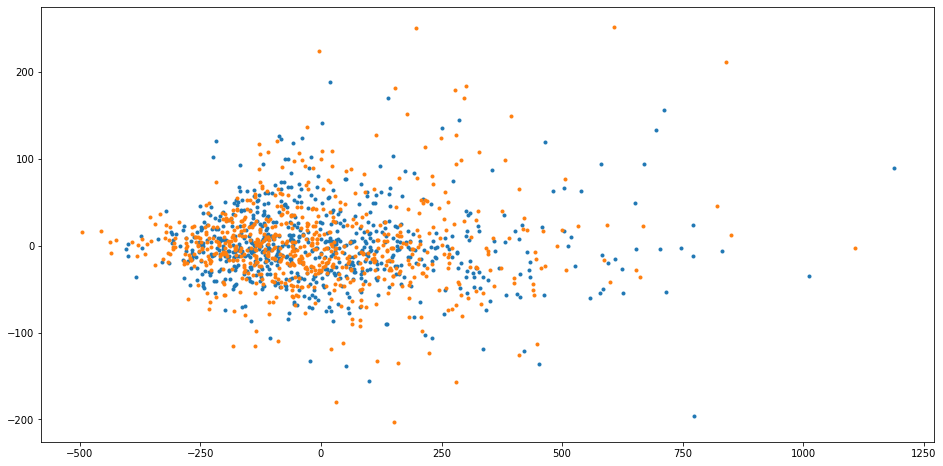

In [18]:
x1 = pca_data.T[0][y_train==1]
y1 = pca_data.T[1][y_train==1]

x2 = pca_data.T[0][y_train==0]
y2 = pca_data.T[1][y_train==0]

plt.figure(figsize=(16,8))
plt.plot(x1,y1, '.')
plt.plot(x2,y2, '.')
# plt.xscale('log')
# plt.yscale('log')

42.01156514251775


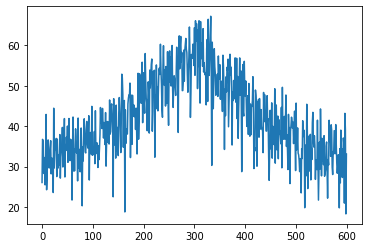

In [57]:
mean = [0,0]
variance = []

# plt.imshow(np.log(np.fft.fftshift(np.fft.fft2(X_train))).real)
i = 700
plt.plot(X_train[0,128] * X_train[i,128])
print(np.sum(X_train[0,128] * X_train[i,128]) / X_train[0,128].shape[0])

18837.774013448496


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


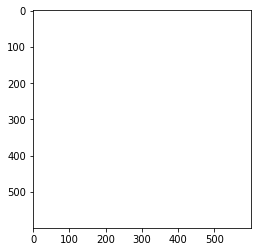

In [80]:
sim = np.matmul(X_train[0].T,X_train[703])
plt.imshow(np.exp(sim))
print(np.sum(sim)/sim.size)